####  Step 1 : Aggregate otus at genus level and add environmental factors to the files and save them.
#### Step 2 : These files (Step 1) used to make a linear regression analysis in the script called (LinearModel.ipynb)
#### Step 3: Results of (Step 2) visualized  

In [2]:
#setworking directory to AbioticAraMicrobe/
setwd('../')

In [6]:
#normalization of environmental factors
library(tidyr)
env_data <- read.table("data/environmental_data.txt" , header = TRUE)
env_data <- separate(data = env_data , col = variable , into = c("Month1" , "Season") , sep = "_" , remove = FALSE)
d1 <- data.frame("envdata"=unique(env_data$env_factor))
#add full names of env factors
d1$environmentalfactor <- c("Precipitation" , "Vapor_Pressure_Deficit" , "Palmer_Drought_Severity_Index" , "Soil_Moisture" , "Runoff" , "Downward_Surface_Shortwave_Radiation" , "Climate_Water_Deficit" , "Actual_Evapotranspiration" , "Vapor_Pressure" , 
                            "Min_Temperature" , "Snow_Water_Equivalent" , "Potential_Evapotranspiration" , "Max_Temperature" , "Wind_Speed")

env_data <- merge(env_data , d1 , by.x = "env_factor" , by.y = "envdata")
env_data$env_value = env_data$value
env_data$season_site <- paste(env_data$Season,env_data$Site)
env_data$site_season_year = paste(env_data$Site , env_data$Season , env_data$Year , sep = "_" ) ###########################################data1
#head(env_data)

#spread env data in different columns
env_data_count <- env_data[c("site_season_year" , "environmentalfactor" , "env_value")] %>% spread(environmentalfactor,env_value) ########################data2
#head(env_data_count)

#normalized env data 
#normalize the environmental data , first group them then do normalization this is z transformation 
stdize=function(x) {(x - mean(x))/sd(x)}
env_data_norm <- data.frame(env_data_count[1] , apply(env_data_count[2:ncol(env_data_count)] ,2, stdize)) #2 is the margin , apply on the columns ########################data3
head(env_data_norm)

,site_season_year,Actual_Evapotranspiration,Climate_Water_Deficit,Downward_Surface_Shortwave_Radiation,Max_Temperature,Min_Temperature,Palmer_Drought_Severity_Index,Potential_Evapotranspiration,Precipitation,Runoff,Snow_Water_Equivalent,Soil_Moisture,Vapor_Pressure,Vapor_Pressure_Deficit,Wind_Speed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ERG_Fall_2014,-0.7926453,-0.4414818,-0.8763182,0.05012492,0.9906967,1.75890428,-0.8341730,0.8456586,2.5965657,-0.2888801,0.4487293,1.20250063,-0.5291563,-1.64483167
2,ERG_Fall_2015,-0.6715747,-0.4414818,-0.9071011,0.54763267,0.7729966,-0.72584920,-0.7223627,1.3417975,-0.1459920,-0.2888801,0.4487293,1.91338392,-0.8400552,0.76040401
3,ERG_Fall_2016,-0.8773947,-0.4414818,-1.0990580,-0.75968695,-0.4015716,0.29204292,-0.9124403,0.5824893,0.1860367,-0.2888801,0.4487293,0.32912973,-1.0473212,-0.39048833
4,ERG_Fall_2017,-0.5686647,-0.4414818,-1.2629743,-0.94125912,-0.3509437,-0.01640924,-0.6273239,2.2175906,1.9922733,-0.2773667,0.4487293,-0.17864405,-1.0473212,0.08797253
5,ERG_Fall_2018,-0.5747183,-0.4414818,-0.7457273,-0.21497044,0.2059637,-1.45585263,-0.6329144,-1.1604683,-0.8100496,-0.2888801,-2.7775231,-0.07708929,-0.8400552,-1.01119431
6,ERG_Spring_2014,0.5330773,2.8443728,1.5312193,1.19766103,0.1350845,0.25777045,1.1504608,-1.4538373,-0.8299713,-0.2888801,-1.0009252,-0.20911047,1.8544022,-0.55859620


---
####  Step 1 : Aggregate otus at genus level (for Bacteria,fungi and Eukaryotes) and add environmental factors to the files and save them.

In [15]:
# Bacteria
library(funrar)
data <- read.table("data/DataClean/BV5Otu.txt" , header = T)
firstotuname = "Otu000002"
rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)

metadata <- data[c(1:n-1)]
metadata$site_season_year <- paste(metadata$Site , metadata$Season , metadata$Year , sep = "_")
metadata$Comp_Season <- paste(metadata$Compartment , metadata$Season, sep = "")
d1 <- metadata
metada_env_data_norm <- merge(d1,env_data_norm , by = "site_season_year" )
rownames(metada_env_data_norm) = metada_env_data_norm$Samplenumber

data1 <- data[-c(1:n-1)]
Taxa <- read.table("data/DataClean/BV5Taxa.txt" , header = T)
Bdata <- t(data1)
Bdata <- cbind(Taxa[match(Taxa$OTU, rownames(Bdata)), c("OTU" , "Genus")],Bdata )
Bdata <- aggregate(. ~  Genus, data = Bdata[-c(1)], sum)
rownames(Bdata) <- Bdata$Genus
Bdata <- t(Bdata[-c(1)])
Bdata <- Bdata[,colSums(Bdata)>=50] #remove otus with less than 50 reads
Bdata <- data.frame(Bdata)

BdataRa <- make_relative(as.matrix(Bdata))
met1 <- metada_env_data_norm
met1<- met1[-c(1:16)]
BdataRa <- merge(met1 , BdataRa , by = "row.names") 
dir.create('data/linearModel')
write.table(BdataRa , "data/linearModel/B_GenusRa.txt" , sep = "\t" , quote = FALSE , row.names = FALSE)
head(BdataRa)

Warning message in dir.create("data/linearModel"):
“'data/linearModel' already exists”


,Row.names,Actual_Evapotranspiration,Climate_Water_Deficit,Downward_Surface_Shortwave_Radiation,Max_Temperature,Min_Temperature,Palmer_Drought_Severity_Index,Potential_Evapotranspiration,Precipitation,Runoff,⋯,WPS.2_ge,Xanthobacteraceae_ge,Xanthobacteraceae_unclassified,Xanthomonadaceae_unclassified,Xanthomonadales_unclassified,Xanthomonas,Xylophilus,YC.ZSS.LKJ147,Yonghaparkia,Yoonia.Loktanella
,<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,S1,0.5270238,3.1101405,1.5005998,1.47001928,0.5502336,0.2577705,1.2063660,-1.5401224,-0.83661192,⋯,0,0.0000000000,0.0001773679,0.0010642072,0,0.000000e+00,0,0.0000000000,0.0000000000,0
2,S10,-0.7986988,-0.4414818,-0.8917336,0.23895998,1.2944643,1.8377309,-0.8397636,0.4012907,1.91922698,⋯,0,0.0002963339,0.0029633393,0.0057996783,0,0.000000e+00,0,0.0009313352,0.0004656676,0
3,S100,-0.7926453,-0.4414818,-0.8763182,0.05012492,0.9906967,1.7589043,-0.8341730,0.8456586,2.59656570,⋯,0,0.0000000000,0.0000000000,0.0009044317,0,7.536931e-05,0,0.0000000000,0.0000000000,0
4,S101,-0.7926453,-0.4414818,-0.8763182,0.05012492,0.9906967,1.7589043,-0.8341730,0.8456586,2.59656570,⋯,0,0.0000000000,0.0000000000,0.0000000000,0,6.564551e-03,0,0.0000000000,0.0000000000,0
5,S102,-0.7926453,-0.4414818,-0.8763182,0.05012492,0.9906967,1.7589043,-0.8341730,0.8456586,2.59656570,⋯,0,0.0000000000,0.0000000000,0.0102249489,0,2.044990e-03,0,0.0000000000,0.0000000000,0
6,S103,-1.6340856,-0.4414818,-0.2359833,-2.25947306,-2.4975683,1.4881518,-1.6112550,-0.8368994,-0.08622687,⋯,0,0.0000000000,0.0000000000,0.0000000000,0,0.000000e+00,0,0.0000000000,0.0000000000,0


In [18]:
#Fungi
library(funrar)
data <- read.table("data/DataClean/FITS2Otu.txt" , header = T)
firstotuname = "Otu00002"

rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)

metadata <- data[c(1:n-1)]
metadata$site_season_year <- paste(metadata$Site , metadata$Season , metadata$Year , sep = "_")
metadata$Comp_Season <- paste(metadata$Compartment , metadata$Season, sep = "")
d1 <- metadata
metada_env_data_norm <- merge(d1,env_data_norm , by = "site_season_year" )
rownames(metada_env_data_norm) = metada_env_data_norm$Samplenumber

data1 <- data[-c(1:n-1)]
Taxa <- read.table("data/DataClean/FITS2Taxa.txt" , header = T)
Bdata <- t(data1)
Bdata <- cbind(Taxa[match(Taxa$OTU, rownames(Bdata)), c("OTU" , "Genus")],Bdata )
Bdata <- aggregate(. ~  Genus, data = Bdata[-c(1)], sum)
rownames(Bdata) <- Bdata$Genus
Bdata <- t(Bdata[-c(1)])
Bdata <- Bdata[,colSums(Bdata)>=50] #remove otus with less than 50 reads
Bdata <- data.frame(Bdata)

BdataRa <- make_relative(as.matrix(Bdata))
met1 <- metada_env_data_norm
met1<- met1[-c(1:16)]
BdataRa <- merge(met1 , BdataRa , by = "row.names") 

write.table(BdataRa , "data/linearModel/F_GenusRa.txt" , sep = "\t" , quote = FALSE , row.names = FALSE)

In [20]:
### Eukaryotes
library(funrar)
data <- read.table("data/DataClean/PV9Otu.txt" , header = T)
firstotuname = "Otu00002"

rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)

metadata <- data[c(1:n-1)]
metadata$site_season_year <- paste(metadata$Site , metadata$Season , metadata$Year , sep = "_")
metadata$Comp_Season <- paste(metadata$Compartment , metadata$Season, sep = "")
d1 <- metadata
metada_env_data_norm <- merge(d1,env_data_norm , by = "site_season_year" )
rownames(metada_env_data_norm) = metada_env_data_norm$Samplenumber

data1 <- data[-c(1:n-1)]
Taxa <- read.table("data/DataClean/PV9Taxa.txt" , header = T)
Bdata <- t(data1)
Bdata <- cbind(Taxa[match(Taxa$OTU, rownames(Bdata)), c("OTU" , "Genus")],Bdata )
Bdata <- aggregate(. ~  Genus, data = Bdata[-c(1)], sum)
rownames(Bdata) <- Bdata$Genus
Bdata <- t(Bdata[-c(1)])
Bdata <- Bdata[,colSums(Bdata)>=50] #remove otus with less than 50 reads
min(colSums(Bdata))
Bdata <- data.frame(Bdata)
BdataRa <- make_relative(as.matrix(Bdata))
met1 <- metada_env_data_norm
met1<- met1[-c(1:16)]
BdataRa <- merge(met1 , BdataRa , by = "row.names") 

write.table(BdataRa , "data/linearModel/O_GenusRa.txt" , sep = "\t" , quote = FALSE , row.names = FALSE)
head(BdataRa)

[1] 51

,Row.names,Actual_Evapotranspiration,Climate_Water_Deficit,Downward_Surface_Shortwave_Radiation,Max_Temperature,Min_Temperature,Palmer_Drought_Severity_Index,Potential_Evapotranspiration,Precipitation,Runoff,⋯,Vorticella,Vrihiamoeba,Watanabea,WIM.1.lineage_X,WIM1.lineage_X,WIM80.lineage_X,Xanthonema,Xanthophyceae_XX_unclassified,Xylochloris,Zygnemophyceae_X_unclassified
,<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,S1,0.5270238,3.1101405,1.5005998,1.47001928,0.5502336,0.2577705,1.2063660,-1.5401224,-0.83661192,⋯,0,0,0.0000000000,0,0,0,0.000000000,0.03639696,0,0
2,S10,-0.7986988,-0.4414818,-0.8917336,0.23895998,1.2944643,1.8377309,-0.8397636,0.4012907,1.91922698,⋯,0,0,0.0003559081,0,0,0,0.002643889,0.34660362,0,0
3,S100,-0.7926453,-0.4414818,-0.8763182,0.05012492,0.9906967,1.7589043,-0.8341730,0.8456586,2.59656570,⋯,0,0,0.0256490460,0,0,0,0.000000000,0.00000000,0,0
4,S101,-0.7926453,-0.4414818,-0.8763182,0.05012492,0.9906967,1.7589043,-0.8341730,0.8456586,2.59656570,⋯,0,0,0.0000000000,0,0,0,0.000000000,0.00000000,0,0
5,S102,-0.7926453,-0.4414818,-0.8763182,0.05012492,0.9906967,1.7589043,-0.8341730,0.8456586,2.59656570,⋯,0,0,0.0000000000,0,0,0,0.000000000,0.00000000,0,0
6,S103,-1.6340856,-0.4414818,-0.2359833,-2.25947306,-2.4975683,1.4881518,-1.6112550,-0.8368994,-0.08622687,⋯,0,0,0.0500000000,0,0,0,0.000000000,0.05000000,0,0


#### Step 2 : These files (Step 1) used to make a linear regression analysis in the script called (LinearModel.ipynb)

---
#### Step 3: Results of (Step 2) visualized  here:

In [6]:
df <- read.table("data/linearModel/linermodelresult.csv" , sep = "," , header = TRUE)
dim(df)
df <- df[df$P_t < 0.05 , ]
df <- df[df$env!="const" , ]
head(df)
df$env = gsub("Downward_Surface_Shortwave_Radiation","Radiation" , df$env)
df$env = gsub("Palmer_Drought_Severity_Index","Drought" , df$env)
dim(df)

[1] 29010    10

,X,env,coef,std.err,t,P_t,Int_0.025,Int_0.975,microbes,taxa
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
7,7,Palmer_Drought_Severity_Index,-1.000e-04,4.89e-05,-2.064,0.039,0.000,-4.90e-06,X.Eubacterium._fissicatena_group,Bacteria
15,15,Wind_Speed,-9.175e-05,4.47e-05,-2.051,0.041,0.000,-3.91e-06,X.Eubacterium._fissicatena_group,Bacteria
32,2,Actual_Evapotranspiration,1.800e-03,1.00e-03,2.169,0.030,0.000,3.00e-03,X0319.6G20_ge,Bacteria
38,8,Potential_Evapotranspiration,1.800e-03,1.00e-03,2.178,0.030,0.000,3.00e-03,X0319.6G20_ge,Bacteria
70,10,Runoff,-5.000e-04,0.00e+00,-2.295,0.022,-0.001,-6.61e-05,X1174.901.12,Bacteria
94,4,Downward_Surface_Shortwave_Radiation,-9.700e-03,4.00e-03,-2.404,0.017,-0.018,-2.00e-03,X67.14_ge,Bacteria


[1] 3008   10

`summarise()` has grouped output by 'env'. You can override using the `.groups`
argument.


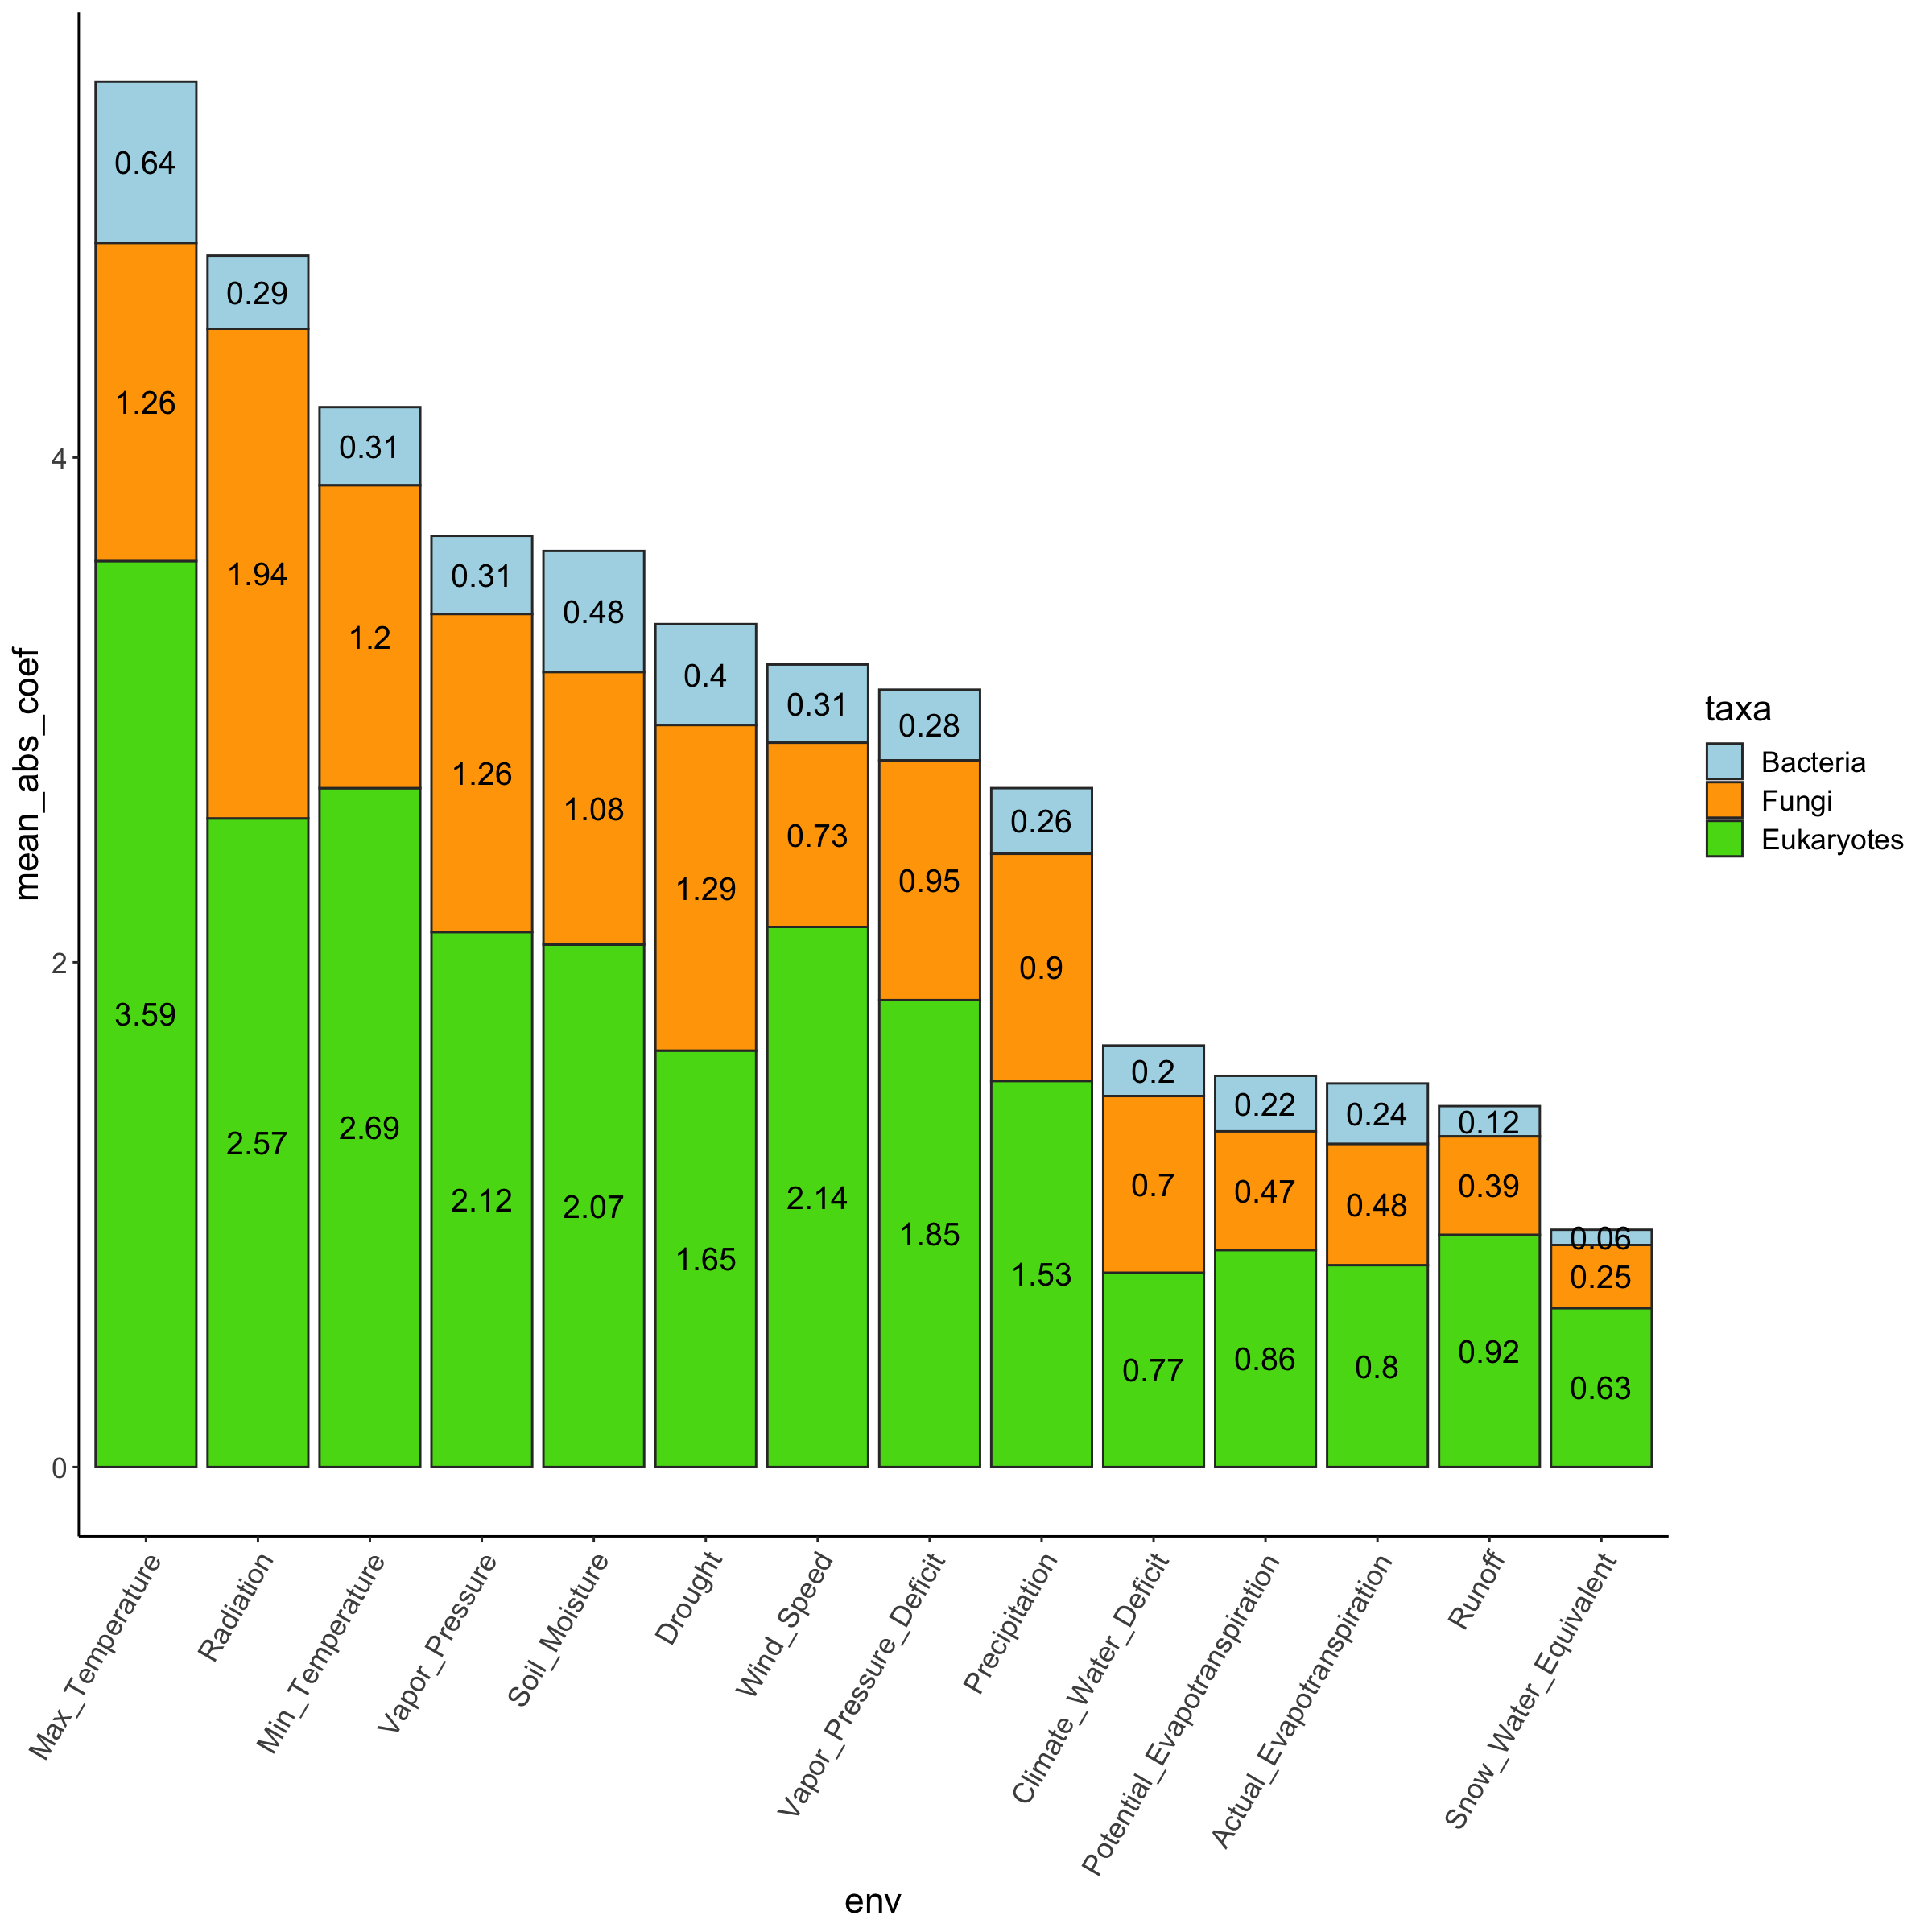

In [16]:
#plot avarage of absolute values of environmental factors per all genus of each microbial taxa (bacteia, fungi, Eukaryotes)
library(tidyr)
library(dplyr)
library(ggplot2)
df1 <- df %>% group_by(env ,taxa) %>% summarise(mean_abs_coef = mean(abs(coef))) #avarage of abs(coef)
df1$mean_abs_coef <- (round(df1$mean_abs_coef , digits = 4)) * 100 #round and percentage
dfB = df1 %>% group_by(env) %>% summarise(mean_abs_coef = mean(mean_abs_coef))
#reorder the factor of environmental factors by sort of coefficient values
dfB = dfB[order(dfB$mean_abs_coef , decreasing = FALSE) ,]
dfB$env = reorder(dfB$env , -(dfB$mean_abs_coef))
df1$env = factor(df1$env , levels= levels(factor(dfB$env))) 

df1$taxa = factor(df1$taxa, levels = c('Bacteria' ,'Fungi' , 'Eukaryotes'))

plt <- ggplot(data = df1, aes(x = env, y = mean_abs_coef, fill = taxa , group=taxa)) + 
    geom_col(colour="gray20") +  geom_text(aes(label = mean_abs_coef),
              position =position_stack(vjust = .5) , size = 5) +
theme_classic()  + 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() , strip.background = element_blank() , text = element_text(size = 16) ,  panel.border = element_blank(),
     axis.text.x = element_text(angle = 60, vjust=1, hjust=1.01)) + 
scale_fill_manual(values = c("lightblue", "orange" , "#55d914"))  
options(repr.plot.width = 12, repr.plot.height =12, repr.plot.res = 200) 
plt
ggsave("plots/avarage_coefficientValues_linearmodel.pdf",plt , width = 12 , height = 12)

---
#### as we can see in previous plot , For bacteria and Eukaryotes max_tempreture and for fungi factor radiation have the highest coefficient values.
#### now we will plot for these factors to see which microbes are mostly associated with these factors.


,X,env,coef,std.err,t,P_t,Int_0.025,Int_0.975,microbes,taxa
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,const,6.094e-06,6.45e-06,0.944,0.345,-6.58e-06,1.88e-05,X.Eubacterium._fissicatena_group,Bacteria
2,2,Actual_Evapotranspiration,-3.422e-05,4.32e-05,-0.792,0.428,0.00e+00,5.06e-05,X.Eubacterium._fissicatena_group,Bacteria
3,3,Climate_Water_Deficit,-3.177e-05,3.02e-05,-1.052,0.293,-9.11e-05,2.75e-05,X.Eubacterium._fissicatena_group,Bacteria
4,4,Downward_Surface_Shortwave_Radiation,2.137e-05,5.97e-05,0.358,0.720,-9.58e-05,0.00e+00,X.Eubacterium._fissicatena_group,Bacteria
5,5,Max_Temperature,1.000e-04,8.65e-05,1.234,0.217,-6.31e-05,0.00e+00,X.Eubacterium._fissicatena_group,Bacteria
6,6,Min_Temperature,-5.412e-05,6.31e-05,-0.857,0.392,0.00e+00,6.98e-05,X.Eubacterium._fissicatena_group,Bacteria


,X,env,coef,std.err,t,P_t,Int_0.025,Int_0.975,microbes,taxa
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
7,7,Palmer_Drought_Severity_Index,-1.000e-04,4.89e-05,-2.064,0.039,0.000,-4.90e-06,X.Eubacterium._fissicatena_group,Bacteria
15,15,Wind_Speed,-9.175e-05,4.47e-05,-2.051,0.041,0.000,-3.91e-06,X.Eubacterium._fissicatena_group,Bacteria
32,2,Actual_Evapotranspiration,1.800e-03,1.00e-03,2.169,0.030,0.000,3.00e-03,X0319.6G20_ge,Bacteria
38,8,Potential_Evapotranspiration,1.800e-03,1.00e-03,2.178,0.030,0.000,3.00e-03,X0319.6G20_ge,Bacteria
70,10,Runoff,-5.000e-04,0.00e+00,-2.295,0.022,-0.001,-6.61e-05,X1174.901.12,Bacteria
94,4,Downward_Surface_Shortwave_Radiation,-9.700e-03,4.00e-03,-2.404,0.017,-0.018,-2.00e-03,X67.14_ge,Bacteria


,X,env,coef,std.err,t,P_t,Int_0.025,Int_0.975,microbes,taxa
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
7,7,Drought,-1.000e-04,4.89e-05,-2.064,0.039,0.000,-4.90e-06,X.Eubacterium._fissicatena_group,Bacteria
15,15,Wind_Speed,-9.175e-05,4.47e-05,-2.051,0.041,0.000,-3.91e-06,X.Eubacterium._fissicatena_group,Bacteria
32,2,Actual_Evapotranspiration,1.800e-03,1.00e-03,2.169,0.030,0.000,3.00e-03,X0319.6G20_ge,Bacteria
38,8,Potential_Evapotranspiration,1.800e-03,1.00e-03,2.178,0.030,0.000,3.00e-03,X0319.6G20_ge,Bacteria
70,10,Runoff,-5.000e-04,0.00e+00,-2.295,0.022,-0.001,-6.61e-05,X1174.901.12,Bacteria
94,4,Radiation,-9.700e-03,4.00e-03,-2.404,0.017,-0.018,-2.00e-03,X67.14_ge,Bacteria


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


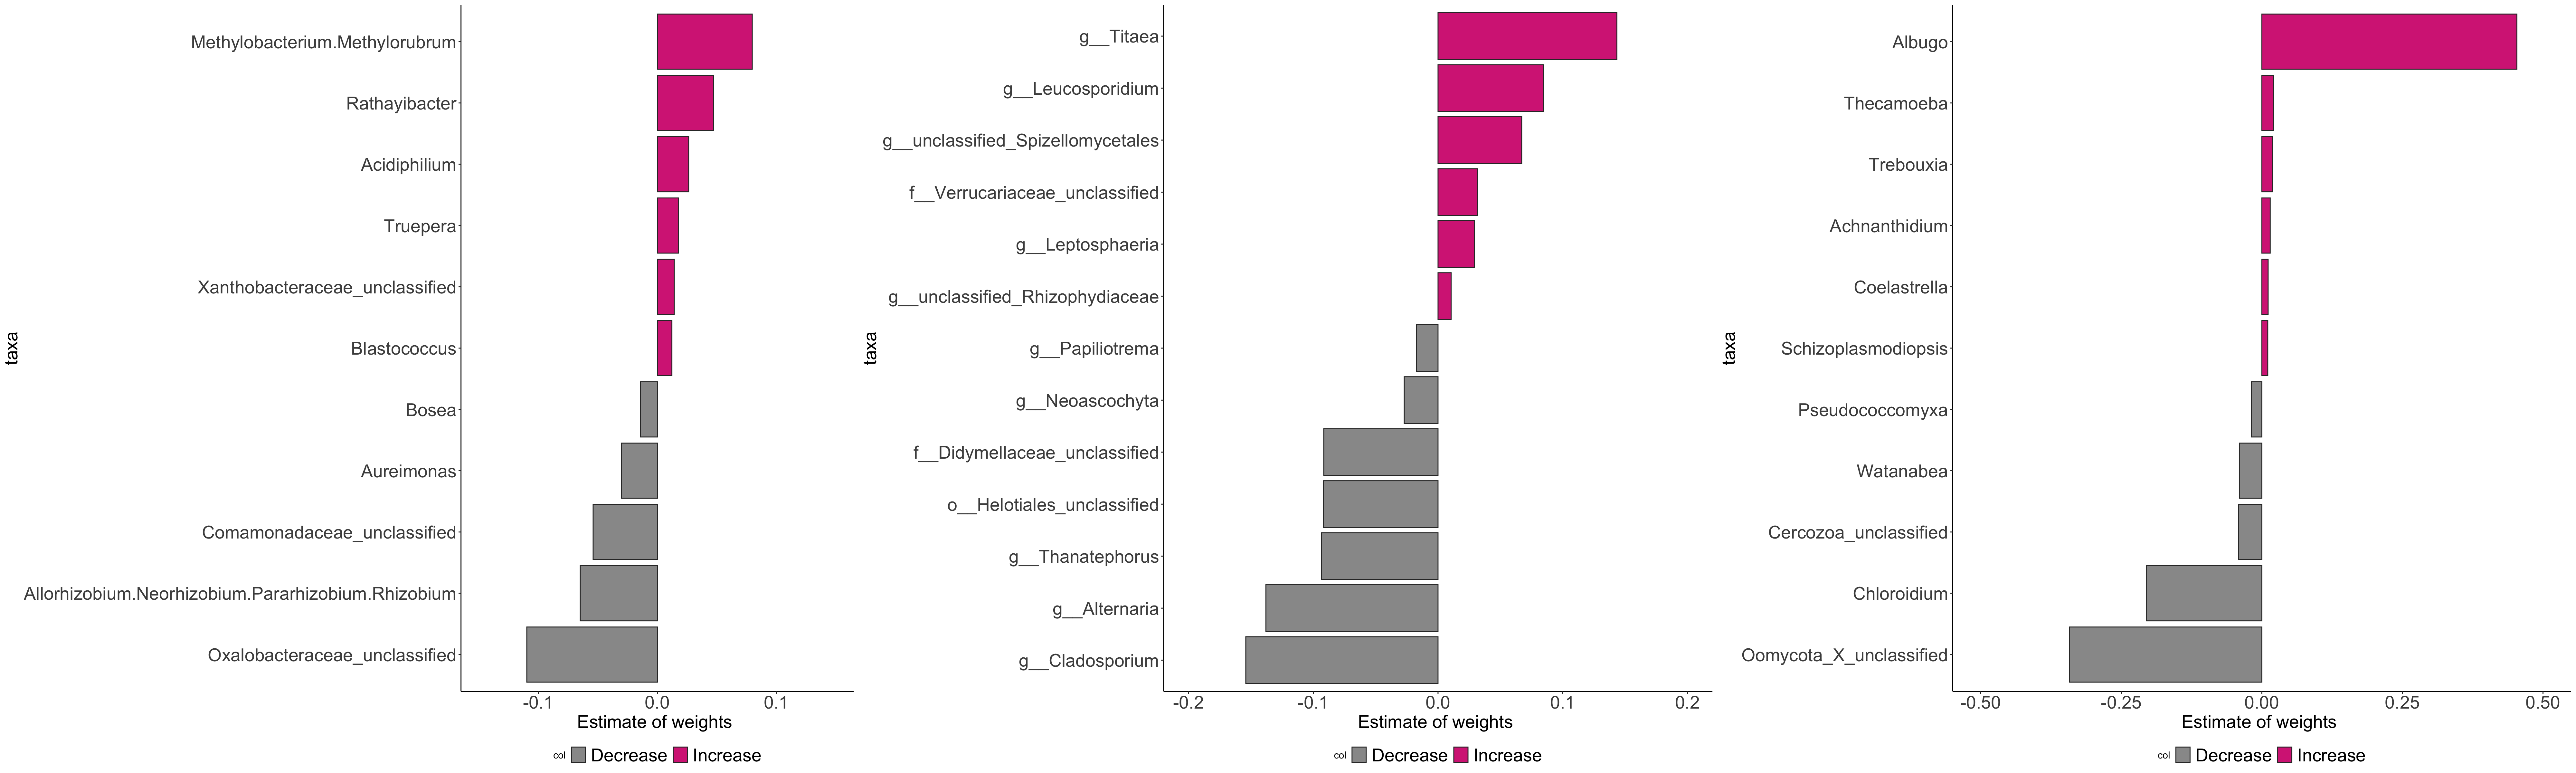

In [21]:
library(ggpubr)

df <- read.table("data/linearModel/linermodelresult.csv" , sep = "," , header = TRUE)
head(df)
df <- df[df$P_t < 0.05 , ]
df <- df[df$env!="const" , ]
head(df)
df$env = gsub("Downward_Surface_Shortwave_Radiation","Radiation" , df$env)
df$env = gsub("Palmer_Drought_Severity_Index","Drought" , df$env)

df2 = df
head(df2)

B <- subset(df2,(df2$env =="Max_Temperature" & df2$taxa =="Bacteria"))
F <- subset(df2,(df2$env =="Radiation" & df2$taxa =="Fungi"))
O <- subset(df2,(df2$env =="Max_Temperature" & df2$taxa =="Eukaryotes"))

all = B
all$col<-ifelse(all$coef<0,"Decrease","Increase")
s_d1 <- subset(all,abs(all$coef)>=0.01) #treshold for coef
s_d1$microbes = reorder(s_d1$microbes  , s_d1$coef) 
p1 = ggplot(s_d1,  aes(x = microbes, y = coef,fill=col))+ xlab("taxa") + ylab("Estimate of weights ")   + 
      geom_bar(stat = 'identity', position = "identity" , colour="gray20")  + theme_classic() +   ylim(-0.15,+0.15) +  
    theme(legend.position = "bottom",legend.background=element_blank(),legend.text = element_text( size = 20),axis.text=element_text(size=20),axis.title=element_text(size=20)) + coord_flip()  + scale_fill_manual(values = c("gray60" ,"#d62f85" ))
options(repr.plot.width = 12, repr.plot.height =12, repr.plot.res = 200) 
#p1



all = F

all$col<-ifelse(all$coef<0,"Decrease","Increase")
s_d1 <- subset(all,abs(all$coef)>=0.01)
s_d1$microbes = reorder(s_d1$microbes  , s_d1$coef) 
p2 = ggplot(s_d1,  aes(x = microbes, y = coef,fill=col))+ xlab("taxa") + ylab("Estimate of weights ")   + 
      geom_bar(stat = 'identity', position = "identity" , colour="gray20")  + theme_classic() +   ylim(-0.2,+0.2) +  
    theme(legend.position = "bottom",legend.background=element_blank(),legend.text = element_text( size = 20),axis.text=element_text(size=20),axis.title=element_text(size=20)) + coord_flip() + scale_fill_manual(values = c("gray60" ,"#d62f85" ))
options(repr.plot.width = 12, repr.plot.height =12, repr.plot.res = 200) 
#p2




all = O

all$col<-ifelse(all$coef<0,"Decrease","Increase")
s_d1 <- subset(all,abs(all$coef)>=0.01)
s_d1$microbes = reorder(s_d1$microbes  , s_d1$coef) 
p3 = ggplot(s_d1,  aes(x = microbes, y = coef,fill=col))+ xlab("taxa") + ylab("Estimate of weights ")   + 
      geom_bar(stat = 'identity', position = "identity" , colour="gray20")  + theme_classic() +   ylim(-0.5,+0.5) +  scale_fill_manual(values = c("gray", "black" ))  + scale_fill_manual(values = c("gray60" ,"#d62f85" )) +
    theme(legend.position = "bottom",legend.background=element_blank(),legend.text = element_text( size = 20),axis.text=element_text(size=20),axis.title=element_text(size=20)) + coord_flip()
options(repr.plot.width = 12, repr.plot.height =12, repr.plot.res = 200) 
#p3


all_plots = ggarrange(p1,p2,p3, ncol = 3 , hjust = TRUE)
options(repr.plot.width = 40, repr.plot.height =12, repr.plot.res = 200) 

all_plots
ggsave("plots/microbe_increased_decreasedByEnvironmentalFactors.pdf" , all_plots , height = 12 , width = 35)

In [22]:
#plots left to right(bacteria,fungi,eukaryotes)

### make an interaction files to show if there is an association between environmental factor and a microbe according to the coefficient values of linear model, consider that associations as edge to visualize as a network
### make a node table to show some information per node (microbes and environmental data)


In [34]:
#make an edge file
#subset significant pavaluse of linear mode
#add a column according to values of coefficient (positive or negative)
#save this file(dataframe called 'all') as a edge table 
#open this edge table in Cytoscape program for visulization

df <- read.table("data/linearModel/linermodelresult.csv" , sep = "," , header = TRUE)
head(df)
df <- df[df$P_t < 0.05 , ]
df <- df[df$env!="const" , ]
head(df)
df$env = gsub("Downward_Surface_Shortwave_Radiation","Radiation" , df$env)
df$env = gsub("Palmer_Drought_Severity_Index","Drought" , df$env)
all = df


all$interactin<-ifelse(all$coef<0,"negative","positive")
all$microbes <- gsub("\\." , "_" , all$microbes)
all$microbes <- gsub("-" , "_" , all$microbes)
write.table(all , "data/linearModel/edge.txt" , sep = "\t" , row.names = FALSE , quote = FALSE) #edge table
head(all)


#-------------------------------------------------------------------
#Note: this step only helps to better visuliyation and is not mandotory to make a network.
#edge table is enough for making network

# make a node table which has the unique names of all the microbes used in the linear model and enivronmental factors.
#for this, open the taxonomy information and merge them together
taxab = read.table("data/DataClean/BV5Taxa.txt" , header = TRUE)
taxab$taxa <- "Bacteria"
taxaf = read.table("data/DataClean/FITS2Taxa.txt" , header = TRUE)
taxaf$taxa <- "Fungi"
taxao = read.table("data/DataClean/PV9Taxa.txt" , header = TRUE)
taxao$taxa <- "Eukaryotes"
node <- rbind(taxab[-c(1)] , taxaf[-c(1)] , taxao[-c(1,4)])
node <- node[!duplicated(node$Genus) ,-c(1)]

#some changes in taxonomy names, we do this step, because names of taxonomy becomes identical with names in edge table (some of names were change in linear model, i see this differences when i am loading the node table in Cytoscape )
#node table contains names of otus in edge table and adding environmental factors
node$Genus <- gsub("\\." , "_" , node$Genus)
node$Genus <- gsub("\\-" , "_" , node$Genus)
node$Genus <- gsub("67_14_ge" , "X67_14_ge" , node$Genus)
node$Genus <- gsub("37_13_ge" , "X37_13_ge" , node$Genus)
node$Genus <- gsub("1174_901_12" , "X1174_901_12" , node$Genus)
node$Genus <- gsub("0319_6G20_ge" , "X0319_6G20_ge" , node$Genus)
node$Genus <- gsub("01D2Z36_ge" , "X01D2Z36_ge" , node$Genus)
node$Genus <- gsub("966_1" , "X966_1" , node$Genus)
node$Genus <- gsub("\\[Eubacterium]_fissicatena_group" , "X_Eubacterium__fissicatena_group" , node$Genus)
rep.col<-function(x,n){
   matrix(rep(x,each=n), ncol=n, byrow=TRUE)
}

envinfo = rep.col(unique(all$env) , 8)
envinfo = data.frame(envinfo)
envinfo$taxa ="env"
colnames(envinfo) = colnames(node)
dim(node)

# add a column as group , to show if the microbes are in the edge tabe (y) , if not(n) thoes that dont have significant. correlations or if the names are not matches, 
# third (environmental factors as another groups (m))
#at the end we only need (microbes(y) and environmental factors(m) in the Cytoscape , group (n) only to see which microbe are not matches or are removed)
subset = all
d1 = node[node$Genus %in% subset$microbes,]
d1$group = "y"
d2 = node[!(node$Genus %in% subset$microbes),]
d2$group = "n"
node = rbind(d1,d2)
envinfo$group = "m"
node = rbind(node , envinfo)
dim(node)

write.table(node , "data/linearModel/node.txt" , sep = "\t" , row.names = FALSE , quote = FALSE)

,X,env,coef,std.err,t,P_t,Int_0.025,Int_0.975,microbes,taxa
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,const,6.094e-06,6.45e-06,0.944,0.345,-6.58e-06,1.88e-05,X.Eubacterium._fissicatena_group,Bacteria
2,2,Actual_Evapotranspiration,-3.422e-05,4.32e-05,-0.792,0.428,0.00e+00,5.06e-05,X.Eubacterium._fissicatena_group,Bacteria
3,3,Climate_Water_Deficit,-3.177e-05,3.02e-05,-1.052,0.293,-9.11e-05,2.75e-05,X.Eubacterium._fissicatena_group,Bacteria
4,4,Downward_Surface_Shortwave_Radiation,2.137e-05,5.97e-05,0.358,0.720,-9.58e-05,0.00e+00,X.Eubacterium._fissicatena_group,Bacteria
5,5,Max_Temperature,1.000e-04,8.65e-05,1.234,0.217,-6.31e-05,0.00e+00,X.Eubacterium._fissicatena_group,Bacteria
6,6,Min_Temperature,-5.412e-05,6.31e-05,-0.857,0.392,0.00e+00,6.98e-05,X.Eubacterium._fissicatena_group,Bacteria


,X,env,coef,std.err,t,P_t,Int_0.025,Int_0.975,microbes,taxa
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
7,7,Palmer_Drought_Severity_Index,-1.000e-04,4.89e-05,-2.064,0.039,0.000,-4.90e-06,X.Eubacterium._fissicatena_group,Bacteria
15,15,Wind_Speed,-9.175e-05,4.47e-05,-2.051,0.041,0.000,-3.91e-06,X.Eubacterium._fissicatena_group,Bacteria
32,2,Actual_Evapotranspiration,1.800e-03,1.00e-03,2.169,0.030,0.000,3.00e-03,X0319.6G20_ge,Bacteria
38,8,Potential_Evapotranspiration,1.800e-03,1.00e-03,2.178,0.030,0.000,3.00e-03,X0319.6G20_ge,Bacteria
70,10,Runoff,-5.000e-04,0.00e+00,-2.295,0.022,-0.001,-6.61e-05,X1174.901.12,Bacteria
94,4,Downward_Surface_Shortwave_Radiation,-9.700e-03,4.00e-03,-2.404,0.017,-0.018,-2.00e-03,X67.14_ge,Bacteria


,X,env,coef,std.err,t,P_t,Int_0.025,Int_0.975,microbes,taxa,interactin
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
7,7,Drought,-1.000e-04,4.89e-05,-2.064,0.039,0.000,-4.90e-06,X_Eubacterium__fissicatena_group,Bacteria,negative
15,15,Wind_Speed,-9.175e-05,4.47e-05,-2.051,0.041,0.000,-3.91e-06,X_Eubacterium__fissicatena_group,Bacteria,negative
32,2,Actual_Evapotranspiration,1.800e-03,1.00e-03,2.169,0.030,0.000,3.00e-03,X0319_6G20_ge,Bacteria,positive
38,8,Potential_Evapotranspiration,1.800e-03,1.00e-03,2.178,0.030,0.000,3.00e-03,X0319_6G20_ge,Bacteria,positive
70,10,Runoff,-5.000e-04,0.00e+00,-2.295,0.022,-0.001,-6.61e-05,X1174_901_12,Bacteria,negative
94,4,Radiation,-9.700e-03,4.00e-03,-2.404,0.017,-0.018,-2.00e-03,X67_14_ge,Bacteria,negative


[1] 1942    9

[1] 1956   10

### data used to visulize association between environmental factors(microbe_environmentalFactors_associations.png) and microbes via Cytoscape program
### cytoscape file is in (data/linearModel/microbe_environmentalFactors_associations.cys)

![alternative text](../plots/microbe_environmentalFactors_associations.png)